# Import everything needed

In [ ]:
import string # from some string manipulation tasks
import nltk # natural language toolkit
import re # regex
from string import punctuation # solving punctuation problems
from nltk.corpus import stopwords # stop words in sentences
from nltk.stem import WordNetLemmatizer # For stemming the sentence

import numpy as np
import pandas as pd
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk import word_tokenize
import string
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# loading dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!gdown --id 16fcKbkqAvxq6yHlpIfcvbLe6Y1Aco0sZ

Mounted at /content/drive
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=16fcKbkqAvxq6yHlpIfcvbLe6Y1Aco0sZ
To: /content/imdb-reviews.csv
100% 61.9M/61.9M [00:00<00:00, 75.6MB/s]


In [ ]:
df = pd.read_csv('imdb-reviews.csv',sep='\t')
df

,url,rating,review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...
...,...,...,...
45003,http://www.imdb.com/title/tt0449000/usercomments,1.0,I don't even know where to begin...<br /><br /...
45004,http://www.imdb.com/title/tt0109382/usercomments,1.0,One of the worst movies I saw in the 90s. I'd ...
45005,http://www.imdb.com/title/tt0375560/usercomments,1.0,Baldwin has really stooped low to make such mo...
45006,http://www.imdb.com/title/tt0165107/usercomments,1.0,If you liked watching Mel Gibson in Million Do...


In [ ]:
df['rating'].value_counts()

1.0     9359
10.0    8779
8.0     5254
4.0     4611
3.0     4374
7.0     4302
9.0     4173
2.0     4156
Name: rating, dtype: int64

#Creating a new column called sentiment

In [ ]:
def categorise(row):  
    if row['rating'] >= 0.0 and row['rating'] <= 4.0:
        return 0
    else:
        return 1

In [ ]:
df['sentiment'] = df.apply(lambda row: categorise(row), axis=1)
df

,url,rating,review,sentiment
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,1
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,1
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,1
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,0
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,1
...,...,...,...,...
45003,http://www.imdb.com/title/tt0449000/usercomments,1.0,I don't even know where to begin...<br /><br /...,0
45004,http://www.imdb.com/title/tt0109382/usercomments,1.0,One of the worst movies I saw in the 90s. I'd ...,0
45005,http://www.imdb.com/title/tt0375560/usercomments,1.0,Baldwin has really stooped low to make such mo...,0
45006,http://www.imdb.com/title/tt0165107/usercomments,1.0,If you liked watching Mel Gibson in Million Do...,0


#Data cleaning


In [ ]:
#removing rows with at least one missing values
df=df.dropna()
df
#drop duplicates
df.duplicated().sum()
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df


,url,rating,review,sentiment
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,1
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,1
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,1
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,0
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,1
...,...,...,...,...
44922,http://www.imdb.com/title/tt0449000/usercomments,1.0,I don't even know where to begin...<br /><br /...,0
44923,http://www.imdb.com/title/tt0109382/usercomments,1.0,One of the worst movies I saw in the 90s. I'd ...,0
44924,http://www.imdb.com/title/tt0375560/usercomments,1.0,Baldwin has really stooped low to make such mo...,0
44925,http://www.imdb.com/title/tt0165107/usercomments,1.0,If you liked watching Mel Gibson in Million Do...,0


#NLTK

In [ ]:

#https://towardsdatascience.com/nlp-preprocessing-with-nltk-3c04ee00edc0
clean_texts=[]
for text in df['review']:
  #lowercase
  text = text.lower()
  #remove numbers
  text = re.sub('[0-9]+', '', text)
  #remove punctuation
  text_p = "".join([char for char in text if char not in string.punctuation])
  #tokenization
  words = word_tokenize(text_p)
  #stopword removal
  filtered_words = [word for word in words if word not in stop_words]
  #stemming
  stemmed = [porter.stem(word) for word in filtered_words]
  #lemmatization
  lem = [lemmatizer.lemmatize(word) for word in stemmed]
  clean_texts.append(' '.join(lem))
df['clean_review']=clean_texts
df
  
  


,url,rating,review,sentiment,clean_review
0,http://www.imdb.com/title/tt0120623/usercomments,10.0,I thought this was a quiet good movie. It was ...,1,thought quiet good movi fun watch like best ou...
1,http://www.imdb.com/title/tt0043117/usercomments,9.0,Wagon Master is a very unique film amongst Joh...,1,wagon master uniqu film amongst john ford work...
2,http://www.imdb.com/title/tt0043117/usercomments,10.0,This film has to be as near to perfect a film ...,1,film near perfect film john ford made film mag...
3,http://www.imdb.com/title/tt0835204/usercomments,4.0,I gave this 4 stars because it has a lot of in...,0,gave star lot interest theme mani alreadi ment...
4,http://www.imdb.com/title/tt0499603/usercomments,10.0,This movie is really genuine and random. It's ...,1,movi realli genuin random realli hard find mov...
...,...,...,...,...,...
44922,http://www.imdb.com/title/tt0449000/usercomments,1.0,I don't even know where to begin...<br /><br /...,0,dont even know beginbr br worth type review qu...
44923,http://www.imdb.com/title/tt0109382/usercomments,1.0,One of the worst movies I saw in the 90s. I'd ...,0,one worst movi saw id often use benchmark view...
44924,http://www.imdb.com/title/tt0375560/usercomments,1.0,Baldwin has really stooped low to make such mo...,0,baldwin realli stoop low make movi script musi...
44925,http://www.imdb.com/title/tt0165107/usercomments,1.0,If you liked watching Mel Gibson in Million Do...,0,like watch mel gibson million dollar hotel mig...


#Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


tfidf = TfidfTransformer()
clf = CountVectorizer(max_df=0.5,min_df=0.01)

X_cv =  clf.fit_transform(df['clean_review'])

tf_transformer = TfidfTransformer(use_idf=True).fit(X_cv)
X_tf = tf_transformer.transform(X_cv)

#Standard scaler


In [ ]:
from sklearn.model_selection import train_test_split
y=df['sentiment']
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False).fit(X_tf)
X_scaled = scaler.transform(X_tf)


#Train-Test split


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, y, test_size=0.2)

# Choosing best hyperparameters


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()
# Grid search cross validation


parameters = [{'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
              {'penalty':['none', 'elasticnet', 'l1', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]
grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           refit=True,
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, Y_train)  
print(" Results from Grid Search " )
grid_search.best_params_



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver 

 Results from Grid Search 


{'C': 0.001}

#learning curves


F1 Score Train: 1.0
Recall Train: 1.0
Precision Train: 1.0
F1 Score Validation: 0.5199782549605872
Recall Validation: 0.4272950636587
Precision Validation: 0.6640055536272128
**********
F1 Score Train: 0.9325626204238922
Recall Train: 0.9364289662797125
Precision Train: 0.9287280701754386
F1 Score Validation: 0.8542724663281077
Recall Validation: 0.8641947732856824
Precision Validation: 0.8445754202139271
**********
F1 Score Train: 0.9159113094408032
Recall Train: 0.9188584219362059
Precision Train: 0.9129830414234084
F1 Score Validation: 0.8631322094055014
Recall Validation: 0.8691087781996872
Precision Validation: 0.8572372769332453
**********
F1 Score Train: 0.907040704070407
Recall Train: 0.914079822616408
Precision Train: 0.9001091703056768
F1 Score Validation: 0.8687603305785124
Recall Validation: 0.8805003350457896
Precision Validation: 0.8573292735972162
**********
F1 Score Train: 0.9020504294818509
Recall Train: 0.9084693735175108
Precision Train: 0.8957215572981153
F1 Score V

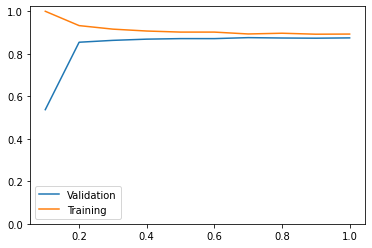

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
list_f1=[]
list_f1_train=[]
list_sample_size=[]

for times in range(10):
  # training
  #
  X, X_unused, y, y_unused = train_test_split(X_train, Y_train, test_size=1 - (times * 0.1 + 0.001))

  classifier = LogisticRegression(C=0.001,solver='sag',max_iter=2000)
  classifier.fit(X, np.ravel(y))

  results_train = classifier.predict(X)

  # validation
  # 
  results = classifier.predict(X_val)

  # score
  #
  f1_train = f1_score(y, results_train)
  recall_train=recall_score(y, results_train)
  precision_train=precision_score(y,results_train)
  print("F1 Score Train: " + str(f1_train))
  print("Recall Train: " + str(recall_train))
  print("Precision Train: " + str(precision_train))

  f1 = f1_score(Y_val, results)
  recall=recall_score(Y_val,results)
  precision=precision_score(Y_val,results)
  print("F1 Score Validation: " + str(f1))
  print("Recall Validation: " + str(recall))
  print("Precision Validation: " + str(precision))
  print("*"*10)

  list_f1.append((f1+recall+precision)/3)
  list_f1_train.append((f1_train+recall_train+precision_train)/3)
  list_sample_size.append((times * 0.1 + 0.1))

# print(plot_data)
plt.plot(list_sample_size, list_f1)
plt.plot(list_sample_size, list_f1_train)

plt.ylim(ymin=0)
plt.legend(["Validation", "Training"])

#Confusion Matrix 




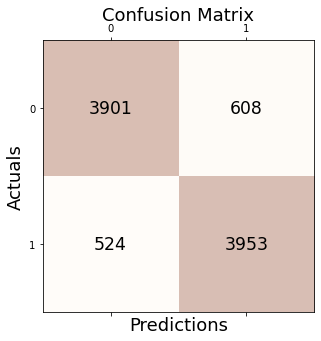

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=Y_val, y_pred=results)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
